<div style="background-color: #cce5ff; border-left: 5px solid #cce5ff; padding: 10px;">
    <h1 align="center">Deep Learning in Python</h1>
    <h2 align="center">NLP Fake News Detection</h2>
  
</div>

# Introduction

Fake news detection is a critical application of Natural Language Processing (NLP), a subfield of artificial intelligence that enables machines to understand, interpret, and analyze human language. By combining computational linguistics and machine learning techniques, NLP can process vast amounts of text to extract meaningful information, classify documents, and generate insights. In today's digital age, where information is rapidly disseminated across platforms, distinguishing between genuine and misleading content has become increasingly important. NLP offers powerful tools to address this challenge, with applications ranging from sentiment analysis and chatbots to fake news detection.

Fake news, often spread through social media, poses significant threats by misinforming the public and influencing opinions on critical issues such as politics, health, and global events. The detection of fake news is not only important for maintaining the integrity of news sources but also for fostering a well-informed society. By leveraging NLP techniques, it is possible to analyze linguistic patterns, writing styles, and content features that differentiate fake news from legitimate news.

 

# Objective

This project aims to apply NLP techniques to classify news articles as either legit or fake using advanced neural networks such as GRU. By utilizing a labeled dataset of fake and legitimate news articles from Kaggle, the project will develop a classification model that accurately distinguishes between the two categories.  The dataset for this project can be downloaded from the following link: https://www.kaggle.com/c/fake-news/data.



# Exploratory Data Analysis (EDA)

Before diving into model building, it's essential to understand the structure and characteristics of the data.

###  Data Overview

The dataset contains:
train.csv: A training dataset with the following attributes:

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks the article as potentially unreliable

1: unreliable

0: reliable

test.csv: A testing training dataset with all the same attributes at train.csv without the label.

## Loading Data

The dataset contains two files, train.csv and test.csv.


In [4]:

import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Display basic information and structure
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [6]:
df_train.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [7]:
df_test.tail()

,id,title,author,text
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...


In [8]:
# Missing value
# Check if the dataset contains missing values
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
df_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

the train file has 20800 entries with 39 text missing values, the test file has 5200 entries with 7 text missing values. For this analysis, the fake news detection models on the content of the article, so it important to delete any entry with missing text in the train and test files.

In [10]:
## Delete rows with missing value on the text field


# Drop rows where the "text" field has missing values
train = df_train.dropna(subset=['text'])

# Display the cleaned dataframe
print(train.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20761 non-null  int64 
 1   title   20203 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20761 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 973.2+ KB
None


In [11]:
## Delete rows with missing value on the text field


# Drop rows where the "text" field has missing values
test = df_test.dropna(subset=['text'])

# Display the cleaned dataframe
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5193 non-null   int64 
 1   title   5071 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 202.9+ KB
None


### Real Vs Fake news distribution from the train dataframe

In [14]:
# Print the number of real and fake news
print("Number of Real News:", train[train['label'] == 0].shape[0])
print("Number of Fake News:", train[train['label'] == 1].shape[0])

Number of Real News: 10387
Number of Fake News: 10374


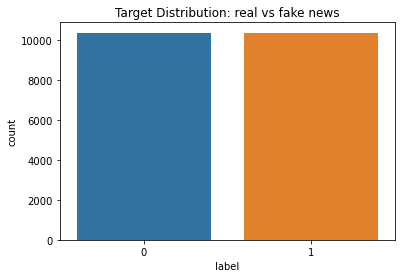

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=train)
plt.title('Target Distribution: real vs fake news')
plt.show()

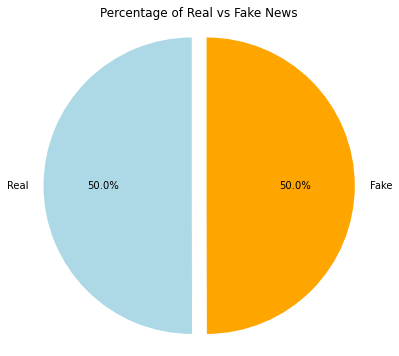

In [16]:
# Count the number of real and fake news
news_counts = train['label'].value_counts()

# Labels for the pie chart
labels = ['Real', 'Fake']

# Values for the pie chart
sizes = news_counts

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'], explode=(0, 0.1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Percentage of Real vs Fake News')
plt.show()

From the above plot, we notice that our data is balanced, we have 10387 real news vs 10374 fake news which reprensent 50% of real news vs % 50 % of fake news.

## Sentiment Analysis

C:\conda_tmp\ipykernel_37068\4080482383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['polarity'] = train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


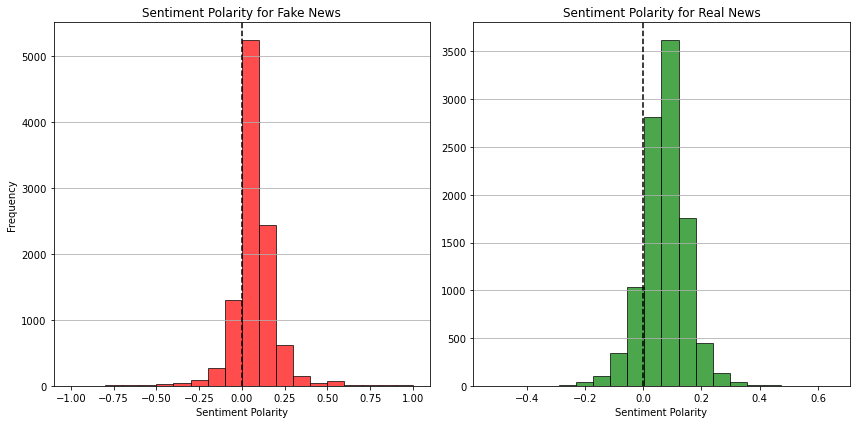

In [19]:
# Import necessary libraries
from textblob import TextBlob
import matplotlib.pyplot as plt

# If polarity isn't already calculated, we compute it here
# Apply TextBlob sentiment analysis to calculate polarity for both fake and real news
train['polarity'] = train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Separate Real and Fake news
Fake_news = train[train['label'] == 1]
Real_news = train[train['label'] == 0]

# Plotting sentiment polarity distributions
plt.figure(figsize=(12, 6))

# Fake News
plt.subplot(1, 2, 1)
plt.hist(Fake_news['polarity'], bins=20, color='red', alpha=0.7, edgecolor='black')
plt.title('Sentiment Polarity for Fake News')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.axvline(x=0, color='black', linestyle='--')  # Vertical line at polarity 0
plt.grid(axis='y')

# Real News
plt.subplot(1, 2, 2)
plt.hist(Real_news['polarity'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Sentiment Polarity for Real News')
plt.xlabel('Sentiment Polarity')
plt.axvline(x=0, color='black', linestyle='--')  # Vertical line at polarity 0
plt.grid(axis='y')

plt.tight_layout()
plt.show()


 ## N-grams Analysis
Analyze the most common unigrams, bigrams, or trigrams in the tweets.

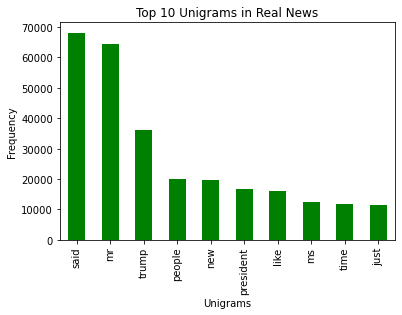

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

# Separate real news
Real_news = train[train['label'] == 0]

# Vectorizer for unigrams (ngram_range=(1,1) for unigrams only)
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')

# Fit and transform the 'text' column of real news
unigrams = vectorizer.fit_transform(Real_news['text'])

# Create a DataFrame for the unigrams
unigram_df = pd.DataFrame(unigrams.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the occurrences of each unigram and get the top 10 most frequent ones
unigram_sum = unigram_df.sum().sort_values(ascending=False).head(10)

# Plotting the top 10 unigrams
unigram_sum.plot(kind='bar', color='green')
plt.title('Top 10 Unigrams in Real News')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.show()


In [26]:
# Printing the top 10 unigrams and their frequencies
print("Top 10 Unigrams:")
for unigram, frequency in top_10_unigrams:
    print(f"Unigram: '{unigram}', Frequency: {frequency}")

Top 10 Unigrams:
Unigram: 'trump', Frequency: 20147
Unigram: 'clinton', Frequency: 19254
Unigram: 'people', Frequency: 16598
Unigram: 'hillary', Frequency: 12762
Unigram: 'said', Frequency: 11875
Unigram: 'just', Frequency: 10488
Unigram: 'new', Frequency: 10395
Unigram: 'like', Frequency: 10319
Unigram: 'time', Frequency: 9235
Unigram: 'world', Frequency: 9180


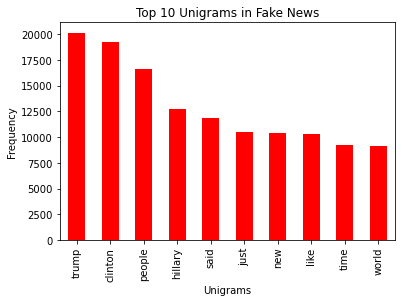

Top 10 Unigrams:
Unigram: 'trump', Frequency: 20147
Unigram: 'clinton', Frequency: 19254
Unigram: 'people', Frequency: 16598
Unigram: 'hillary', Frequency: 12762
Unigram: 'said', Frequency: 11875
Unigram: 'just', Frequency: 10488
Unigram: 'new', Frequency: 10395
Unigram: 'like', Frequency: 10319
Unigram: 'time', Frequency: 9235
Unigram: 'world', Frequency: 9180


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Separate fake news
Fake_news = train[train['label'] == 1]

# Vectorizer for unigrams (ngram_range=(1,1) for unigrams only)
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')

# Fit and transform the 'text' column of fake news
unigrams = vectorizer.fit_transform(Fake_news['text'])

# Sum the occurrences of each unigram without converting to a dense matrix
unigram_sum = np.array(unigrams.sum(axis=0)).flatten()

# Get the unigram feature names and their corresponding frequencies
unigram_frequencies = [(word, unigram_sum[idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort by frequency and select the top 10 unigrams
top_10_unigrams = sorted(unigram_frequencies, key=lambda x: x[1], reverse=True)[:10]

# Convert top 10 unigrams to a DataFrame for easy plotting
top_unigrams_df = pd.DataFrame(top_10_unigrams, columns=['Unigram', 'Frequency'])

# Plotting the top 10 unigrams
top_unigrams_df.plot(kind='bar', x='Unigram', y='Frequency', color='red', legend=False)
plt.title('Top 10 Unigrams in Fake News')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.show()


print("Top 10 Unigrams:")
for unigram, frequency in top_10_unigrams:
    print(f"Unigram: '{unigram}', Frequency: {frequency}")

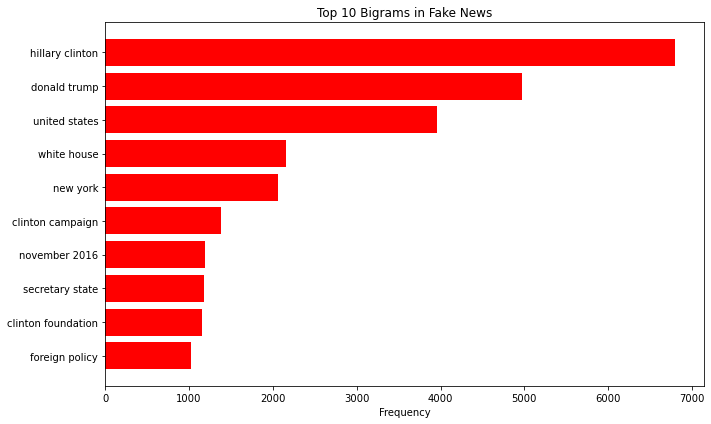

Bigram: 'hillary clinton', Frequency: 6802
Bigram: 'donald trump', Frequency: 4972
Bigram: 'united states', Frequency: 3954
Bigram: 'white house', Frequency: 2152
Bigram: 'new york', Frequency: 2060
Bigram: 'clinton campaign', Frequency: 1377
Bigram: 'november 2016', Frequency: 1193
Bigram: 'secretary state', Frequency: 1180
Bigram: 'clinton foundation', Frequency: 1156
Bigram: 'foreign policy', Frequency: 1024


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Initialize the CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Fit and transform the fake news text to get the bigrams
bigrams = vectorizer.fit_transform(Fake_news['text'])  # Assuming Fake_news is your dataset

# Sum the occurrences of each bigram
bigram_sum = bigrams.sum(axis=0)

# Get the bigram feature names and their corresponding counts
bigram_freq = [(bigram, bigram_sum[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]

# Sort the bigrams by frequency and get the top 10
top_10_bigrams = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10]

# Extract bigram labels and their corresponding frequencies for plotting
bigram_labels = [bigram for bigram, freq in top_10_bigrams]
bigram_frequencies = [freq for bigram, freq in top_10_bigrams]

# Plot the top 10 bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram_labels, bigram_frequencies, color='red')
plt.title('Top 10 Bigrams in Fake News')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.tight_layout()
plt.show()

# Print the top 10 bigrams
for bigram, frequency in top_10_bigrams:
    print(f"Bigram: '{bigram}', Frequency: {frequency}")


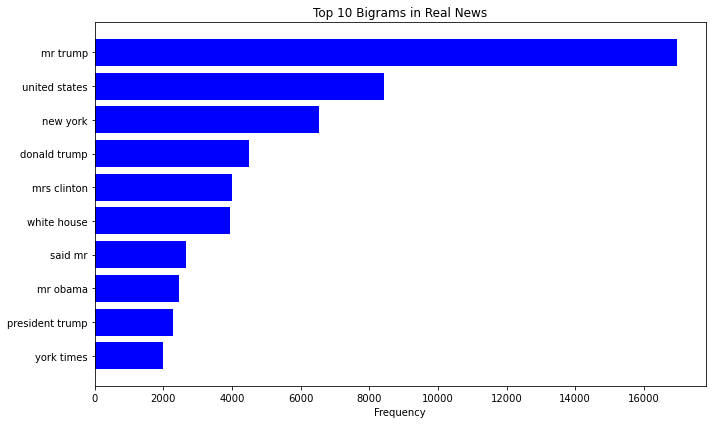

Bigram: 'mr trump', Frequency: 16948
Bigram: 'united states', Frequency: 8417
Bigram: 'new york', Frequency: 6521
Bigram: 'donald trump', Frequency: 4490
Bigram: 'mrs clinton', Frequency: 4008
Bigram: 'white house', Frequency: 3931
Bigram: 'said mr', Frequency: 2654
Bigram: 'mr obama', Frequency: 2462
Bigram: 'president trump', Frequency: 2294
Bigram: 'york times', Frequency: 1981


In [51]:
# Initialize the CountVectorizer for bigrams
vectorizer_real = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Fit and transform the real news text to get the bigrams
bigrams_real = vectorizer_real.fit_transform(Real_news['text'])  # Assuming Real_news is your dataset

# Sum the occurrences of each bigram
bigram_sum_real = bigrams_real.sum(axis=0)

# Get the bigram feature names and their corresponding counts
bigram_freq_real = [(bigram, bigram_sum_real[0, idx]) for bigram, idx in vectorizer_real.vocabulary_.items()]

# Sort the bigrams by frequency and get the top 10
top_10_bigrams_real = sorted(bigram_freq_real, key=lambda x: x[1], reverse=True)[:10]

# Extract bigram labels and their corresponding frequencies for plotting
bigram_labels_real = [bigram for bigram, freq in top_10_bigrams_real]
bigram_frequencies_real = [freq for bigram, freq in top_10_bigrams_real]

# Plot the top 10 bigrams for real news
plt.figure(figsize=(10, 6))
plt.barh(bigram_labels_real, bigram_frequencies_real, color='blue')
plt.title('Top 10 Bigrams in Real News')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.tight_layout()
plt.show()

# Print the top 10 bigrams for real news
for bigram, frequency in top_10_bigrams_real:
    print(f"Bigram: '{bigram}', Frequency: {frequency}")


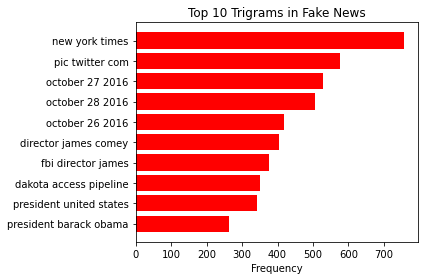

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize the CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')

# Fit and transform the text data from Fake_news
trigrams = vectorizer.fit_transform(Fake_news['text'])

# Get the sum of each trigram (working directly with the sparse matrix)
trigram_sums = np.array(trigrams.sum(axis=0)).flatten()

# Get the top 10 trigrams
trigram_indices = trigram_sums.argsort()[::-1][:10]
top_trigrams = [vectorizer.get_feature_names_out()[i] for i in trigram_indices]
top_trigram_counts = trigram_sums[trigram_indices]

# Plot the top 10 trigrams
plt.barh(top_trigrams, top_trigram_counts, color='red')
plt.title('Top 10 Trigrams in Fake News')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.tight_layout()
plt.show()




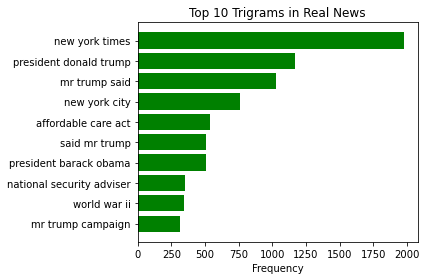

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize the CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')

# Fit and transform the text data from Real_news
trigrams = vectorizer.fit_transform(Real_news['text'])

# Get the sum of each trigram (working directly with the sparse matrix)
trigram_sums = np.array(trigrams.sum(axis=0)).flatten()

# Get the top 10 trigrams
trigram_indices = trigram_sums.argsort()[::-1][:10]
top_trigrams = [vectorizer.get_feature_names_out()[i] for i in trigram_indices]
top_trigram_counts = trigram_sums[trigram_indices]

# Plot the top 10 trigrams
plt.barh(top_trigrams, top_trigram_counts, color='green')
plt.title('Top 10 Trigrams in Real News')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.tight_layout()
plt.show()


# Model and Training 

GRU Model
For this project, we will use a GRU-based neural network, which is known for efficiently processing sequences like text data.

Model Architecture
We will build a GRU-based neural network with the following structure:

Embedding layer: To convert tokens into dense vectors of fixed size.

GRU layer: To capture dependencies in the sequence.

Dense layer with sigmoid activation: For binary classification.

In [44]:
import pandas as pd
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



# Text preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply cleaning function to training and test data
train['cleaned_text'] = train['text'].apply(clean_text)
test['cleaned_text'] = test['text'].apply(clean_text)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train['cleaned_text'])

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(train['cleaned_text'])
X_test_sequences = tokenizer.texts_to_sequences(test['cleaned_text'])

# Pad sequences to ensure equal length
X_train_padded = pad_sequences(X_train_sequences, maxlen=100, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=100, padding='post')

# Target variable (disaster or non-disaster)
y_train = train['label']

# Train-test split (for model validation purposes)
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)

# Build the GRU model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(GRU(units=128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))



# Make predictions on the validation set
y_val_pred_probs = model.predict(X_val)

# Convert probabilities to binary values (0 or 1)
y_val_pred = (y_val_pred_probs > 0.5).astype(int).flatten()

# Generate the classification report
report = classification_report(y_val, y_val_pred, target_names=['Class 0', 'Class 1'])
print(report)





[nltk_data] Downloading package stopwords to C:\Users\Tanya
[nltk_data]     Shoma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\conda_tmp\ipykernel_37068\1080551121.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cleaned_text'] = train['text'].apply(clean_text)
C:\conda_tmp\ipykernel_37068\1080551121.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cleaned_text'] = test['text'].apply(clean_text)
C:\Users\Tanya Shoma\AppData\Roaming\Python\Python

Epoch 1/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 43s 148ms/step - accuracy: 0.7573 - loss: 0.4787 - val_accuracy: 0.8625 - val_loss: 0.3220
Epoch 2/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 40s 153ms/step - accuracy: 0.9073 - loss: 0.2406 - val_accuracy: 0.9083 - val_loss: 0.2359
Epoch 3/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 48s 183ms/step - accuracy: 0.9362 - loss: 0.1803 - val_accuracy: 0.9083 - val_loss: 0.2323
Epoch 4/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 48s 183ms/step - accuracy: 0.9517 - loss: 0.1356 - val_accuracy: 0.9083 - val_loss: 0.2314
Epoch 5/5
260/260 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - accuracy: 0.9591 - loss: 0.1205 - val_accuracy: 0.9201 - val_loss: 0.2131
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step
              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92      2079
     Class 1       0.93      0.91      0.92      2074

    accuracy                           0.92      4153
   macro avg       0.92      0.92      0.92      4153
weighted avg       0.92      0.92   

In [41]:
import pandas as pd

# Make predictions on the test set
predictions = model.predict(X_test_padded)
# Convert probabilities to binary values (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': test['id'],  
    'label': predicted_labels
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
Submission file created: submission.csv


# Results and Discussion

In this study, we evaluated GRU models for classifying news into fake news and legit (Real) news categories. The implementations of GRU resulted in high accuracy, approximately 0.91. 
The classification report reveals the precision, recall, and F1-scores for both classes:

| Class                      | Precision | Recall | F1-Score |
|----------------------------|-----------|--------|----------|
| Real News (Class 0)         | 0.91     | 0.93   | 0.92    |
| Fake News (Class 1)         | 0.93      | 0.91  | 0.92     |


The precision score indicates that when the model predicts a news as legit, it is correct 91% of the time. The recall score of 93% for class 0 suggests that the model successfully identifies 93% of actual legit news. For class 1, the precision is  at 93%, the recall is 91%, indicating that the model has high performance in identifying fake news.

The weighted average F1-score of 0.91 reflects a balanced performance across both classes, reinforcing that the GRU model effectively captures the nuances in the dataset. 

# Conclusion

In this project, we built a GRU-based neural network to classify fakenews. The GRU model was chosen due to its efficiency in processing short sequences. After conducting exploratory data analysis, we preprocessed the text data, tokenized it, and padded sequences to make them uniform. The GRU model demonstrated good performance in classifying tweets, as evident from the validation results. 

# GITHUB Link: 
    
the project can be found on the following link: https://github.com/TanyaShoma/GRU_Fake_News.